## Select the data and run you would like to plot below:

In [2]:
breadboard_repo_path = r'C:\Users\Alex\Dropbox (MIT)\lab side projects\control software\breadboard-python-client\\'
import sys
sys.path.insert(0, breadboard_repo_path)
from breadboard import BreadboardClient
bc = BreadboardClient(config_path='API_CONFIG_fermi1.json') # enter your path to the API_config
from measurement_directory import *
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os
import ipywidgets as widgets
from image_watchdog import getFileList
%matplotlib notebook

print('today\'s measurement(s):')
print(todays_measurements())
watchfolder = measurement_directory()

def get_newest_df(watchfolder, optional_column_names = []):
    files, _ = getFileList(watchfolder)
    run_ids = [run_id_from_filename(file) for file in files]
    return bc.get_runs_df_from_ids(run_ids, optional_column_names = optional_column_names)

# #can also add subplots for simultaneous plotting of various things

#enable below and disable above for testing mode
x_params, y_params = [],[]
# filename = r'08\200804\foo\image_log.csv'
column_names = get_newest_df(watchfolder).columns
list_bound_vars, analyzed_vars = column_names, column_names
xvars_menu = widgets.Dropdown(options = list_bound_vars, description = 'horizontal')
yvars_menu = widgets.Dropdown(options = analyzed_vars, description = 'vertical')
append_button = widgets.Button(description = 'add new plot')
def update_vars(button):
    x_params.append(xvars_menu.value)
    y_params.append(yvars_menu.value)
append_button.on_click(update_vars)
clear_button = widgets.Button(description = 'clear plots')
def clear_vars(button):
    x_params.clear()
    y_params.clear()
clear_button.on_click(clear_vars)
display(xvars_menu, yvars_menu, append_button, clear_button)

today's measurement(s):
['foo', 'misplacedimages111701']
Enter name for this set of runs:foo


TypeError: 'NoneType' object is not subscriptable

## Run the cell below and rejoice as the data comes in! 

Sometimes the animation doesn't load on the first run. Just run the cell again.

<IPython.core.display.Javascript object>


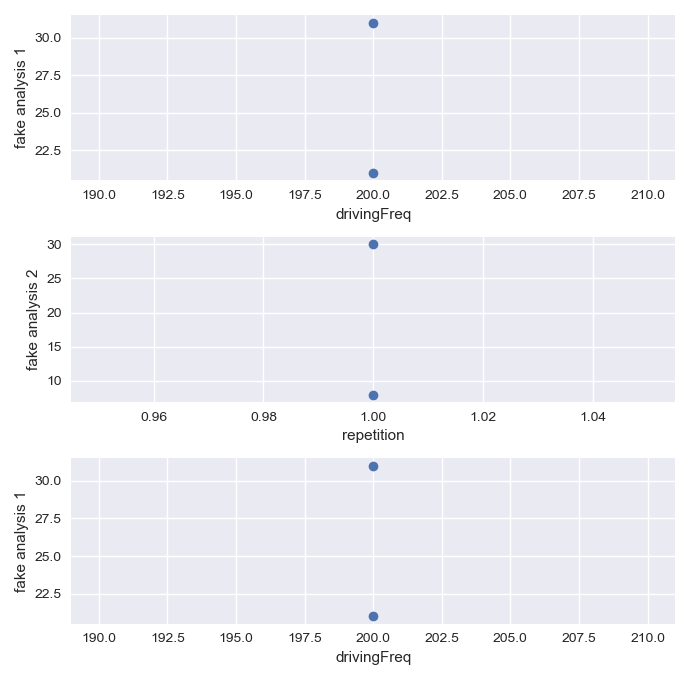

In [23]:
%matplotlib notebook
plt.style.use('seaborn')
plt.figure(figsize = (5,2.5*len(x_params)))
    
def generate_subplots(watchfolder, x_params, y_params):
    data = get_newest_df(watchfolder)
    for i in range(len(x_params)):
        plt.subplot(len(x_params),1,i+1)
        x = data[x_params[i]]
        y = data[y_params[i]]
        plt.cla()
        plt.plot(x, y, 'o')
        plt.xlabel(x_params[i])
        plt.ylabel(y_params[i])
    plt.tight_layout()

def animate(i):
    if os.path.exists(watchfolder):
        generate_subplots(watchfolder, x_params, y_params)
    #         plt.legend(loc='upper left')
        
    else:
        plt.plot(0,0)

ani = FuncAnimation(plt.gcf(), animate, interval=1000)

<IPython.core.display.Javascript object>


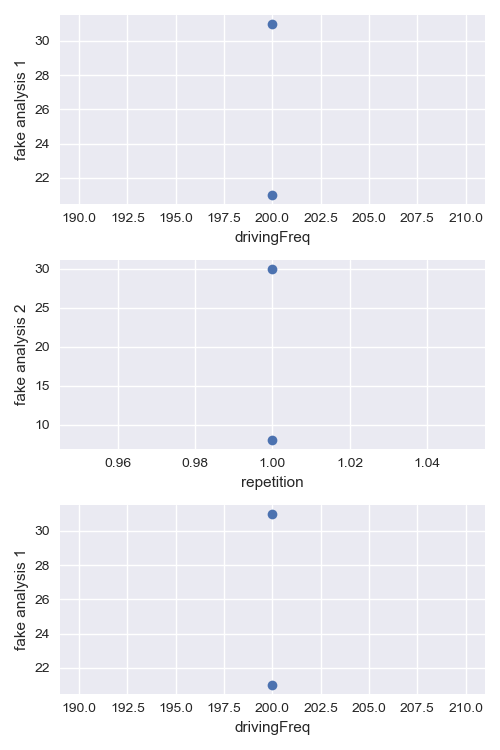

In [24]:
plt.style.use('seaborn')
plt.figure(figsize = (5,2.5*len(x_params)))
generate_subplots(filename, x_params, y_params)